In [1]:

!pip install numpy==1.16.1
import numpy as np

from keras.datasets import imdb 

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)




Using TensorFlow backend.


In [0]:
#cant feed integers into neural network - must turn into tensors - 2 ways of doing that - we will stick with one-hot encode method
#one-hot encode your lists turn into vectors of 0s and 1s. ex: turning the sequence [3,5] into a 10,000 demensional vector that would be all 0s except for indices 3 and 5, which would be 1s, then you could use the first layer in your network a Dense layer, capable of handling floating-point vector data.

#import numpy as np
def vectorize_sequences(sequences, dimension=10000):    
    # Create an all-zero matrix of shape (len(sequences), dimension)    
    results = np.zeros((len(sequences), dimension))    
    
    for i, sequence in enumerate(sequences):   
    # set specific indices of results[i] to 1s  
        results[i, sequence] = 1. 
  
    return results
  
# Our vectorized training data 
x_train = vectorize_sequences(train_data)
# Our vectorized test data 
x_test = vectorize_sequences(test_data)

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
#num_words meaning that you will keep only the top 10,00 most frequentally occuring words 
#will allow us to work with vector of managable size
#train_labels and test_labels are lists of 0s and 1s where 0 is negative and 1 is positive 


In [0]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')
# now the data is ready to be fed into the neural networl
#input data is vectors and labels are scalars (1s and 0s)


In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))



Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#configure model with the rmsprop optimizer and the binary_crossentropy loss function 
#passing optimizer, loss function and metrics as strings which is possible because rmsprop, binary_crossentropy and accuracy are all packaged as part of keras 

model.compile(optimizer='rmsprop', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [0]:
#configure optimizer 

from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [0]:
#using custom losses and metrics 

from keras import losses
from keras import metrics 

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

In [0]:
#create validation set by seperating 10,000 samples from the original training data
#setting aside validation set 

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]



In [14]:
#now train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors) in mini batches of 512 samples 
#also we will montitor loss and accuracy on the 10,000 samples that we set apart - we do so by passing the validation data as the validation_data argument 

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data =(x_val, y_val))

#at the end of every epoch there is slight pause then the model computes its loss and accuracy on the 10,000 samples of the validation data


Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.5087 - acc: 0.7813 - val_loss: 0.3800 - val_acc: 0.8690
Epoch 2/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.3008 - acc: 0.9051 - val_loss: 0.3006 - val_acc: 0.8901
Epoch 3/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2181 - acc: 0.9277 - val_loss: 0.3084 - val_acc: 0.8719
Epoch 4/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1751 - acc: 0.9435 - val_loss: 0.2841 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2847 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1150 - acc: 0.9654 - val_loss: 0.3157 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 2s 137us/step - 

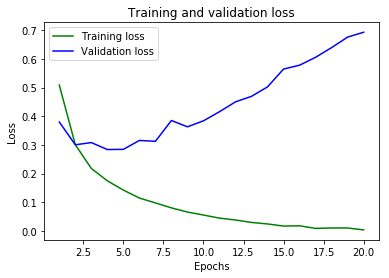

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#"bo" os for "blue dot"
plt.plot(epochs, loss_values, 'g', label = 'Training loss')

#"b" is for "solid blue line"
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

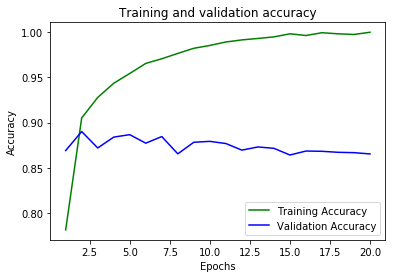

In [18]:
#clears figure
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
#quantity should be less every iteration 

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 110us/step - loss: 0.4736 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.2672 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 3s 100us/step - loss: 0.2032 - acc: 0.9286
Epoch 4/4
25000/25000 [==============================] - 2s 92us/step


In [42]:
results

[0.3118888929367065, 0.87624]

In [23]:
#part 3.5

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# see the data
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    #create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # set specific indices of results[i] to 1s
        results[i, sequence] = 1.  
    return results

#our vectorized training data
x_train = vectorize_sequences(train_data)
#our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
#vectorized our labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
#Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), is it best to use the binary_crossentropy loss

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras import optimizers
# values passed in as strings 
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [0]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [0]:
#create validation set by setting apart 10000 samples 

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [31]:
#We will now train our model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.5052 - binary_accuracy: 0.7859 - val_loss: 0.3782 - val_binary_accuracy: 0.8700
Epoch 2/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.2994 - binary_accuracy: 0.9045 - val_loss: 0.3003 - val_binary_accuracy: 0.8896
Epoch 3/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.2174 - binary_accuracy: 0.9285 - val_loss: 0.3080 - val_binary_accuracy: 0.8715
Epoch 4/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.1747 - binary_accuracy: 0.9439 - val_loss: 0.2836 - val_binary_accuracy: 0.8842
Epoch 5/20
15000/15000 [==============================] - 3s 177us/step - loss: 0.1422 - binary_accuracy: 0.9542 - val_loss: 0.2856 - val_binary_accuracy: 0.8860
Epoch 6/20
15000/15000 [==============================] - 3s 176us/step - loss: 0.1148 - binary_accuracy: 0.9653 - val_loss: 0.3118 - val_bi

In [32]:
#note that the call to model.fit() returns a History object. 
#this object has a member history, which is a dictionary containing data about everything that happened during training lets see below 

history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

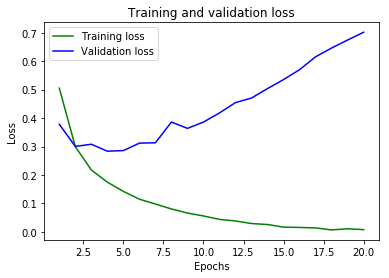

In [36]:

import matplotlib.pyplot as plt

# use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy

acc = history.history['val_binary_accuracy']
val_acc = history.history['binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "g" is for green line
plt.plot(epochs, loss, 'g', label='Training loss')
# b is for solid blue line
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


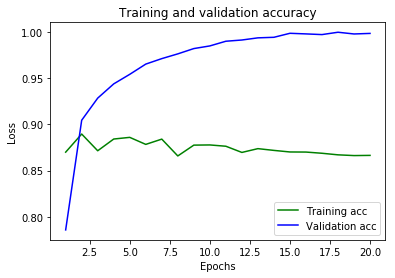

In [39]:
#clear 
plt.clf() 

acc_values = history_dict['val_binary_accuracy']
val_acc_values = history_dict['binary_accuracy']

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [40]:
#train new network from scratch for 4 epochs
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 157us/step - loss: 0.4737 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 3s 126us/step - loss: 0.2674 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 3s 126us/step - loss: 0.2032 - acc: 0.9285
Epoch 4/4
25000/25000 [==============================] - 2s 96us/step


In [41]:
results

[0.3118888929367065, 0.87624]